# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import pathlib
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
from keras.utils.np_utils import to_categorical
import pickle
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from keras.models import Sequential
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras_applications.resnet import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19

# Uploading Dataset

In [2]:
data_path =r'C:\Users\shaha\Desktop\dataset\training_data'
CATEGORIES = ['smoking','notsmoking']

# Preprocessing

In [3]:
training_data = []
IMG_SIZE=128

def trian_dataset():
    for category in CATEGORIES:
        path = os.path.join(data_path, category) # path to our data
        class_num = CATEGORIES.index(category)# classifcation index
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resizing our imgz
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
trian_dataset()

In [4]:
print(len(training_data))

5551


# Shuflle data

In [11]:
import random
random.shuffle(training_data)
train_data, labels_data = zip(*training_data)

# Labeling

In [5]:
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = to_categorical(y, num_classes = 2)

In [6]:
X.shape

(5551, 128, 128, 3)

In [7]:
y.shape

(5551, 2)

# Split Data (Train - Validation)

In [8]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=.2, random_state=42)

# Transfer Models ...

## 1- MobileNet :

* Activation --> Relu 
* Dropout --> 0.5
* Softmax
* Filter --> 128

In [9]:
from tensorflow.keras.applications import mobilenet_v2
mob = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3)) 

for layer in mob.layers:
    layer.trainable = False 
    
headmodel = mob.output
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(2, activation = "softmax")(headmodel)

model = Model(inputs = mob.input, outputs = headmodel)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
M = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
139/139 [==============================] - 98s 704ms/step - loss: 0.5464 - accuracy: 0.6856 - val_loss: 0.5760 - val_accuracy: 0.7111
Epoch 2/10
139/139 [==============================] - 94s 678ms/step - loss: 0.5350 - accuracy: 0.7081 - val_loss: 0.5628 - val_accuracy: 0.7291
Epoch 3/10
139/139 [==============================] - 94s 678ms/step - loss: 0.5049 - accuracy: 0.7189 - val_loss: 0.5528 - val_accuracy: 0.7336
Epoch 4/10
139/139 [==============================] - 96s 689ms/step - loss: 0.5133 - accuracy: 0.7248 - val_loss: 0.5634 - val_accuracy: 0.7354
Epoch 5/10
139/139 [==============================] - 92s 666ms/step - loss: 0.4951 - accuracy: 0.7320 - val_loss: 0.5758 - val_accuracy: 0.7183
Epoch 6/10
139/139 [==============================] - 93s 670ms/step - loss: 0.4813 - accuracy: 0.7417 - val_loss: 0.5601 - val_accuracy: 0.7300
Epoch 7/10
139/139 [==============================] - 92s 664ms/step - loss: 0.4848 - accuracy: 0.7403 - val_loss: 0.6048 - val_ac

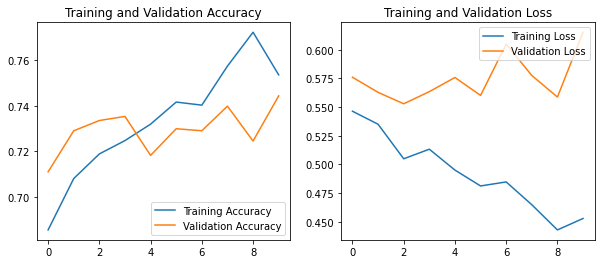

In [12]:
acc = M.history['accuracy']
val_acc = M.history['val_accuracy']

loss = M.history['loss']
val_loss = M.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

* Change filter --> 100 - 50
* Adam --> lr = 0.0001

In [13]:
optimizerX= tf.keras.optimizers.Adam(learning_rate=0.0001)

In [14]:
mob = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3)) 

for layer in mob.layers:
    layer.trainable = False 
    
headmodel = mob.output
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(100, activation = "relu")(headmodel)
headmodel = Dense(50, activation = "relu")(headmodel)
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(2, activation = "softmax")(headmodel)

model = Model(inputs = mob.input, outputs = headmodel)
model.compile(optimizer=optimizerX, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
M2 = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10, batch_size=64)

Epoch 1/10
70/70 [==============================] - 93s 1s/step - loss: 0.6748 - accuracy: 0.6347 - val_loss: 0.6092 - val_accuracy: 0.6922
Epoch 2/10
70/70 [==============================] - 91s 1s/step - loss: 0.5898 - accuracy: 0.6982 - val_loss: 0.5752 - val_accuracy: 0.7075
Epoch 3/10
70/70 [==============================] - 89s 1s/step - loss: 0.5483 - accuracy: 0.7284 - val_loss: 0.5903 - val_accuracy: 0.6850
Epoch 4/10
70/70 [==============================] - 100s 1s/step - loss: 0.5154 - accuracy: 0.7541 - val_loss: 0.5180 - val_accuracy: 0.7606
Epoch 5/10
70/70 [==============================] - 104s 1s/step - loss: 0.4820 - accuracy: 0.7795 - val_loss: 0.5361 - val_accuracy: 0.7525
Epoch 6/10
70/70 [==============================] - 97s 1s/step - loss: 0.4605 - accuracy: 0.7874 - val_loss: 0.5404 - val_accuracy: 0.7480
Epoch 7/10
70/70 [==============================] - 100s 1s/step - loss: 0.4273 - accuracy: 0.8153 - val_loss: 0.5083 - val_accuracy: 0.7678
Epoch 8/10
70/70 

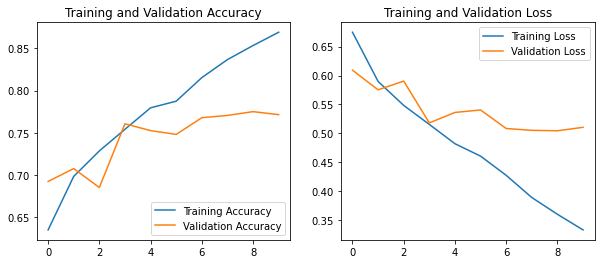

In [16]:
acc = M2.history['accuracy']
val_acc = M2.history['val_accuracy']

loss = M2.history['loss']
val_loss = M2.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

* Adam --> 0.00001

In [18]:
optimizerX= tf.keras.optimizers.Adam(learning_rate=0.00001)

In [19]:
mob3 = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

for layer in mob3.layers:
    layer.trainable = False  

m3 = mob3.output
m3 = Flatten()(m3)
m3 = Dense(100, activation='relu')(m3)
m3 = Dense(50, activation='relu')(m3)
m3 = Dropout(0.5)(m3)
m3 = Dense(2, activation='softmax')(m3) 
mod3 =  Model(inputs=mob3.input, outputs=m3)
mod3.compile(optimizer=optimizerX, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
M3 = mod3.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10, batch_size=64)

Epoch 1/10
70/70 [==============================] - 98s 1s/step - loss: 0.7523 - accuracy: 0.5721 - val_loss: 0.6362 - val_accuracy: 0.6355
Epoch 2/10
70/70 [==============================] - 86s 1s/step - loss: 0.6500 - accuracy: 0.6227 - val_loss: 0.6174 - val_accuracy: 0.6625
Epoch 3/10
70/70 [==============================] - 86s 1s/step - loss: 0.6232 - accuracy: 0.6534 - val_loss: 0.6014 - val_accuracy: 0.6742
Epoch 4/10
70/70 [==============================] - 88s 1s/step - loss: 0.5963 - accuracy: 0.6757 - val_loss: 0.5860 - val_accuracy: 0.6994
Epoch 5/10
70/70 [==============================] - 87s 1s/step - loss: 0.5826 - accuracy: 0.6894 - val_loss: 0.5782 - val_accuracy: 0.7048
Epoch 6/10
70/70 [==============================] - 86s 1s/step - loss: 0.5650 - accuracy: 0.7110 - val_loss: 0.5666 - val_accuracy: 0.7174
Epoch 7/10
70/70 [==============================] - 86s 1s/step - loss: 0.5502 - accuracy: 0.7110 - val_loss: 0.5571 - val_accuracy: 0.7201
Epoch 8/10
70/70 [==

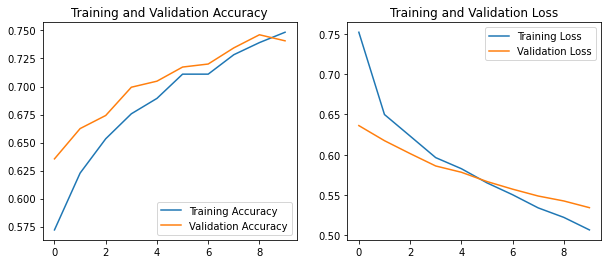

In [21]:
acc = M3.history['accuracy']
val_acc = M3.history['val_accuracy']

loss = M3.history['loss']
val_loss = M3.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## 2- ResNet50 :

In [22]:
resnet = Sequential()

pretrained_model = tf.keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(128,128,3),
                                                 pooling='avg', classes= 2 )
for layer in pretrained_model.layers:
    layer.trainable = False
    
resnet.add(pretrained_model)
resnet.add(Flatten())
resnet.add(Dense(100, activation = 'relu'))
resnet.add(Dense(2, activation = 'softmax'))
resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 100)               204900    
                                                                 
 dense_12 (Dense)            (None, 2)                 202       
                                                                 
Total params: 23,792,814
Trainable params: 205,102
Non-trainable params: 23,587,712
_________________________________________________________________


In [23]:
optimizerX= tf.keras.optimizers.Adam(learning_rate=0.0001)    
resnet.compile(loss="binary_crossentropy", optimizer=optimizerX ,metrics=["accuracy"])

In [24]:
resnet_m = resnet.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10, batch_size=64)

Epoch 1/10
70/70 [==============================] - 361s 5s/step - loss: 0.6060 - accuracy: 0.7214 - val_loss: 0.4936 - val_accuracy: 0.7975
Epoch 2/10
70/70 [==============================] - 353s 5s/step - loss: 0.4562 - accuracy: 0.8056 - val_loss: 0.4368 - val_accuracy: 0.8101
Epoch 3/10
70/70 [==============================] - 320s 5s/step - loss: 0.4023 - accuracy: 0.8318 - val_loss: 0.4135 - val_accuracy: 0.8191
Epoch 4/10
70/70 [==============================] - 316s 5s/step - loss: 0.3680 - accuracy: 0.8511 - val_loss: 0.3994 - val_accuracy: 0.8245
Epoch 5/10
70/70 [==============================] - 335s 5s/step - loss: 0.3410 - accuracy: 0.8667 - val_loss: 0.3876 - val_accuracy: 0.8362
Epoch 6/10
70/70 [==============================] - 324s 5s/step - loss: 0.3128 - accuracy: 0.8815 - val_loss: 0.3860 - val_accuracy: 0.8335
Epoch 7/10
70/70 [==============================] - 325s 5s/step - loss: 0.2907 - accuracy: 0.8894 - val_loss: 0.3796 - val_accuracy: 0.8326
Epoch 8/10
70

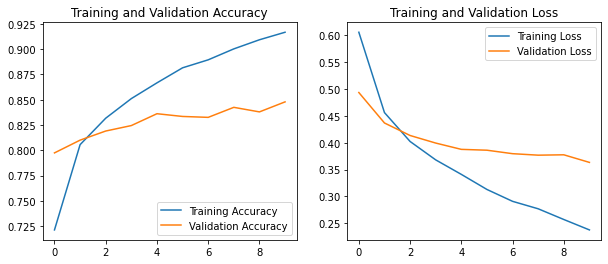

In [25]:
acc = resnet_m.history['accuracy']
val_acc = resnet_m.history['val_accuracy']

loss = resnet_m.history['loss']
val_loss = resnet_m.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## 3-  vgg19 :

In [19]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = vgg19.output

model = Flatten(name = "flatten")(model)
model = Dense(2,activation='sigmoid')(model)
model = Dense(100, activation='relu')(model) 
model = Dense(128, activation='relu')(model)
model= Dropout(0.5)(model)
model = Dense(2, activation='softmax')(model)

vgg19 = Model(inputs=vgg19.input, outputs=model)
vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg19.summary()






Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [20]:
D=vgg19.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
139/139 [==============================] - 522s 4s/step - loss: 0.6294 - accuracy: 0.6696 - val_loss: 0.5748 - val_accuracy: 0.7012
Epoch 2/10
139/139 [==============================] - 17422s 126s/step - loss: 0.5725 - accuracy: 0.7234 - val_loss: 0.5733 - val_accuracy: 0.7309
Epoch 3/10
139/139 [==============================] - 459s 3s/step - loss: 0.5492 - accuracy: 0.7606 - val_loss: 0.5226 - val_accuracy: 0.7840
Epoch 4/10
139/139 [==============================] - 401s 3s/step - loss: 0.5386 - accuracy: 0.7606 - val_loss: 0.5515 - val_accuracy: 0.7462
Epoch 5/10
139/139 [==============================] - 349s 3s/step - loss: 0.5012 - accuracy: 0.7892 - val_loss: 0.4917 - val_accuracy: 0.8056
Epoch 6/10
139/139 [==============================] - 351s 3s/step - loss: 0.4868 - accuracy: 0.7964 - val_loss: 0.4999 - val_accuracy: 0.7885
Epoch 7/10
139/139 [==============================] - 357s 3s/step - loss: 0.4799 - accuracy: 0.7989 - val_loss: 0.4890 - val_accuracy: 0.

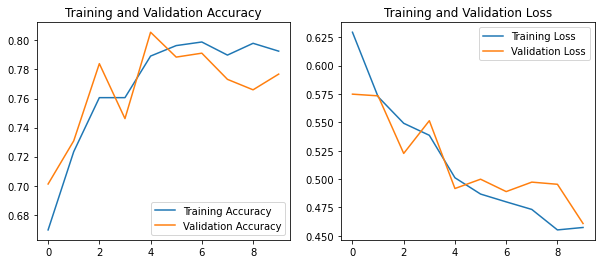

In [21]:
acc = D.history['accuracy']
val_acc = D.history['val_accuracy']

loss = D.history['loss']
val_loss = D.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [19]:
model3= VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in model3.layers:
    layer.trainable = False
    
A1 = model3.output

A1= Flatten(name = "flatten")(A1)
A1 = Dense(2,activation='sigmoid')(A1)
A1 = Dense(32,activation='sigmoid')(A1)
A1 = Dense(64, activation='relu')(A1) 
A1 = Dense(100, activation='relu')(A1)
A1 = Dense(128, activation='relu')(A1)
A1= Dropout(0.5)(A1)
A1 = Dense(2, activation='sigmoid')(A1)

model3 = Model(inputs=model3.input, outputs=A1)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [20]:
L1=model3.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
70/70 [==============================] - 511s 7s/step - loss: 0.6770 - accuracy: 0.5818 - val_loss: 0.6499 - val_accuracy: 0.5878
Epoch 2/10
70/70 [==============================] - 523s 7s/step - loss: 0.5641 - accuracy: 0.7232 - val_loss: 0.5025 - val_accuracy: 0.7723
Epoch 3/10
70/70 [==============================] - 504s 7s/step - loss: 0.4921 - accuracy: 0.7856 - val_loss: 0.5382 - val_accuracy: 0.7669
Epoch 4/10
70/70 [==============================] - 503s 7s/step - loss: 0.4654 - accuracy: 0.8016 - val_loss: 0.5076 - val_accuracy: 0.7786
Epoch 5/10
70/70 [==============================] - 473s 7s/step - loss: 0.4548 - accuracy: 0.8092 - val_loss: 0.4972 - val_accuracy: 0.7696
Epoch 6/10
70/70 [==============================] - 500s 7s/step - loss: 0.4277 - accuracy: 0.8126 - val_loss: 0.4498 - val_accuracy: 0.7948
Epoch 7/10
70/70 [==============================] - 511s 7s/step - loss: 0.4188 - accuracy: 0.8300 - val_loss: 0.4880 - val_accuracy: 0.7858
Epoch 8/10
70

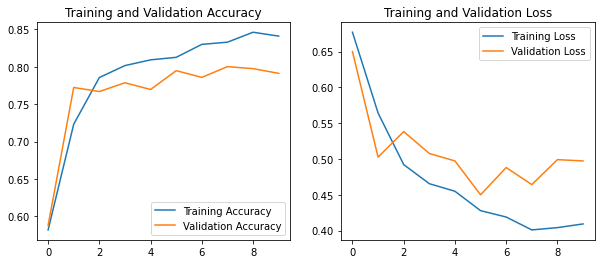

In [21]:
acc = L1.history['accuracy']
val_acc = L1.history['val_accuracy']

loss = L1.history['loss']
val_loss = L1.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [22]:
model4= VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in model4.layers:
    layer.trainable = False
    
A2 = model4.output

A2= Flatten(name = "flatten")(A2)
A2 = Dense(32,activation='relu')(A2)
A2 = Dense(64, activation='relu')(A2) 
A2 = Dense(128, activation='relu')(A2)
A2 = Dense(128, activation='relu')(A2)
A2= Dropout(0.8)(A2)
A2 = Dense(2, activation='sigmoid')(A2)

model4 = Model(inputs=model4.input, outputs=A2)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
L2=model4.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
70/70 [==============================] - 316s 5s/step - loss: 0.9381 - accuracy: 0.6495 - val_loss: 0.5126 - val_accuracy: 0.7885
Epoch 2/10
70/70 [==============================] - 357s 5s/step - loss: 0.4864 - accuracy: 0.7950 - val_loss: 0.4385 - val_accuracy: 0.8065
Epoch 3/10
70/70 [==============================] - 349s 5s/step - loss: 0.3630 - accuracy: 0.8592 - val_loss: 0.4190 - val_accuracy: 0.8218
Epoch 4/10
70/70 [==============================] - 352s 5s/step - loss: 0.2665 - accuracy: 0.8923 - val_loss: 0.4418 - val_accuracy: 0.8299
Epoch 5/10
70/70 [==============================] - 349s 5s/step - loss: 0.1701 - accuracy: 0.9297 - val_loss: 0.4703 - val_accuracy: 0.8344
Epoch 6/10
70/70 [==============================] - 350s 5s/step - loss: 0.1481 - accuracy: 0.9399 - val_loss: 0.7178 - val_accuracy: 0.8308
Epoch 7/10
70/70 [==============================] - 351s 5s/step - loss: 0.1093 - accuracy: 0.9523 - val_loss: 0.8363 - val_accuracy: 0.8461
Epoch 8/10
70

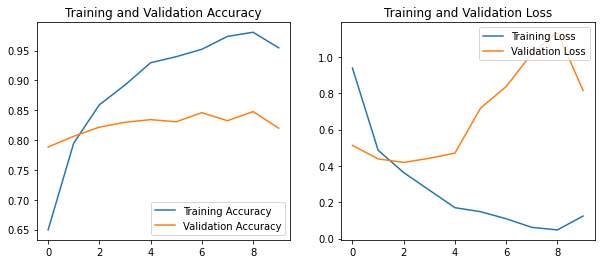

In [24]:
acc = L2.history['accuracy']
val_acc = L2.history['val_accuracy']

loss = L2.history['loss']
val_loss = L2.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## 4- VGG16 :

In [40]:

model5= VGG16(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in model5.layers:
    layer.trainable = False
    
A3 = model5.output

A3= Flatten(name = "flatten")(A3)
A3 = Dense(32,activation='relu')(A3)
A3 = Dense(64, activation='relu')(A3) 
A3 = Dense(128, activation='relu')(A3)
A3 = Dense(128, activation='relu')(A3)
A3= Dropout(0.8)(A3)
A3 = Dense(2, activation='sigmoid')(A3)

model5 = Model(inputs=model5.input, outputs=A3)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
L4=model5.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
70/70 [==============================] - 261s 4s/step - loss: 0.9986 - accuracy: 0.6054 - val_loss: 0.5906 - val_accuracy: 0.7318
Epoch 2/10
70/70 [==============================] - 281s 4s/step - loss: 0.5693 - accuracy: 0.7405 - val_loss: 0.4899 - val_accuracy: 0.7957
Epoch 3/10
70/70 [==============================] - 294s 4s/step - loss: 0.4050 - accuracy: 0.8293 - val_loss: 0.4634 - val_accuracy: 0.8200
Epoch 4/10
70/70 [==============================] - 289s 4s/step - loss: 0.3155 - accuracy: 0.8608 - val_loss: 0.4786 - val_accuracy: 0.8272
Epoch 5/10
70/70 [==============================] - 281s 4s/step - loss: 0.2329 - accuracy: 0.8912 - val_loss: 0.5475 - val_accuracy: 0.8110
Epoch 6/10
70/70 [==============================] - 283s 4s/step - loss: 0.1793 - accuracy: 0.9052 - val_loss: 0.8217 - val_accuracy: 0.8128
Epoch 7/10
70/70 [==============================] - 281s 4s/step - loss: 0.1505 - accuracy: 0.9146 - val_loss: 0.7535 - val_accuracy: 0.8182
Epoch 8/10
70

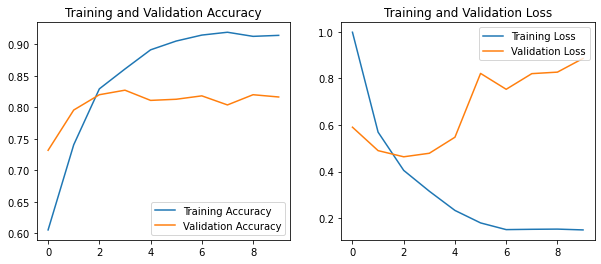

In [43]:
acc = L4.history['accuracy']
val_acc = L4.history['val_accuracy']

loss = L4.history['loss']
val_loss = L4.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## 5- InceptionV3 :

In [31]:
model_5 = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  

for layer in model_5.layers:
    layer.trainable = False  
model = model_5.output

model = Flatten(name = "flatten")(model)
model = Dense(2,activation='sigmoid')(model)
model = Dense(100, activation='relu')(model) 
model = Dense(128, activation='relu')(model)
model= Dropout(0.5)(model)
model = Dense(2, activation='softmax')(model)

model_5= Model(inputs=model_5.input, outputs=model)
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5.summary()



Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [32]:
o=model_5.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10)


Epoch 1/10
139/139 [==============================] - 50s 335ms/step - loss: 0.6809 - accuracy: 0.5833 - val_loss: 0.6780 - val_accuracy: 0.5878
Epoch 2/10
139/139 [==============================] - 50s 360ms/step - loss: 0.6800 - accuracy: 0.5876 - val_loss: 0.6785 - val_accuracy: 0.5878
Epoch 3/10
139/139 [==============================] - 53s 384ms/step - loss: 0.6802 - accuracy: 0.5869 - val_loss: 0.6789 - val_accuracy: 0.5878
Epoch 4/10
139/139 [==============================] - 54s 391ms/step - loss: 0.6800 - accuracy: 0.5869 - val_loss: 0.6782 - val_accuracy: 0.5878
Epoch 5/10
139/139 [==============================] - 56s 403ms/step - loss: 0.6801 - accuracy: 0.5869 - val_loss: 0.6778 - val_accuracy: 0.5878
Epoch 6/10
139/139 [==============================] - 56s 404ms/step - loss: 0.6801 - accuracy: 0.5869 - val_loss: 0.6781 - val_accuracy: 0.5878
Epoch 7/10
139/139 [==============================] - 55s 399ms/step - loss: 0.6796 - accuracy: 0.5869 - val_loss: 0.6782 - val_ac

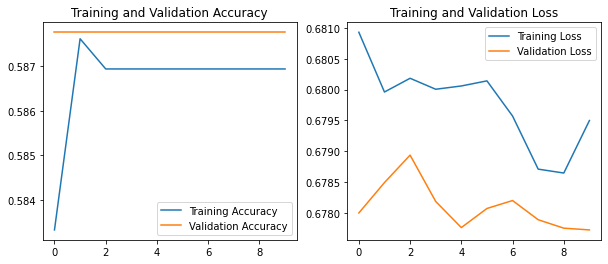

In [33]:
acc = o.history['accuracy']
val_acc = o.history['val_accuracy']

loss = o.history['loss']
val_loss = o.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()